In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

### Описание данных 
- id _a - id абонента, который звонит 
- id _b - id абонента, которому звонят 
- time_key - дата звонка 
- start_time_local - время начала звонка 
- time_zone - часовая зона звонящего абонента 
- duration - длительность звонка 
- forward - индикатор переадресации 
- zero_call_glg - категория звонка с нулевой длительностью 
- source_b - индикатор транзакции из источника B 
- source_f - индикатор транзакции из источника F 
- num_b_length - длина номера абонента, которому звонят

In [2]:
tk_list = list()
for i in tqdm(range(1, 4)):
    if i < 10:
        data = f"0{i}"
    else:
        data = str(i)
    tmp_df = pd.read_csv(f"D:/DS/transactions/time_key=2021-12-{data}.csv")
    tk_list.append(tmp_df)

100%|██████████| 3/3 [00:19<00:00,  6.55s/it]


In [3]:
tk_list = pd.concat(tk_list)

In [4]:
tk_list

,id_a,id_b,start_time_local,time_zone,duration,forward,zero_call_flg,source_b,source_f,num_b_length,time_key
0,46206005,41410057,12:38:21,3,0,0,0,0,1,10,2021-12-01
1,21282169,67490216,13:32:46,3,0,0,5,0,1,10,2021-12-01
2,859841,70423563,02:16:16,7,0,1,5,1,0,10,2021-12-01
3,6325350,75657005,15:41:14,0,0,1,5,1,0,10,2021-12-01
4,6325350,56640545,10:43:39,3,0,0,0,0,1,10,2021-12-01
...,...,...,...,...,...,...,...,...,...,...,...
5661813,1741727,51896509,12:22:54,3,0,0,0,0,1,10,2021-12-03
5661814,8653133,2728848,11:05:46,3,0,0,0,0,1,10,2021-12-03
5661815,34179381,73156247,12:43:38,3,0,0,0,0,1,10,2021-12-03
5661816,6325350,74014974,12:12:10,0,0,0,0,0,1,10,2021-12-03


In [5]:
trg = pd.read_csv("D:/DS/beeline_antispam_hakaton_id_samples.csv")

In [6]:
trg

,id,target,split
0,196535,NaN,test
1,63075900,2.0,train
2,35233935,2.0,train
3,23557360,4.0,train
4,78926486,NaN,test
...,...,...,...
46230,80921520,0.0,train
46231,72917356,0.0,train
46232,35030823,0.0,train
46233,19900090,0.0,train


In [7]:
tk_list = tk_list.merge(trg[['id','target']], left_on='id_a', right_on='id', how='inner') \
                 .drop(columns=['id'])
tk_list

,id_a,id_b,start_time_local,time_zone,duration,forward,zero_call_flg,source_b,source_f,num_b_length,time_key,target
0,46206005,41410057,12:38:21,3,0,0,0,0,1,10,2021-12-01,NaN
1,46206005,10193774,13:39:29,3,0,0,0,0,1,10,2021-12-01,NaN
2,46206005,62857516,12:23:49,3,13,0,0,0,1,10,2021-12-01,NaN
3,46206005,75299555,15:46:20,3,0,0,0,0,1,10,2021-12-01,NaN
4,46206005,813059,12:39:50,3,0,0,0,0,1,10,2021-12-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16528698,12394904,51891250,16:44:37,0,7,0,0,1,0,10,2021-12-03,0.0
16528699,69282927,47086807,12:03:01,0,41,0,5,1,1,10,2021-12-03,NaN
16528700,879148,14114908,13:36:48,3,0,0,0,0,1,10,2021-12-03,4.0
16528701,30512066,63961567,10:55:42,3,3,0,1,0,1,10,2021-12-03,2.0


In [8]:
tk_list.dtypes

id_a                  int64
id_b                  int64
start_time_local     object
time_zone             int64
duration              int64
forward               int64
zero_call_flg         int64
source_b              int64
source_f              int64
num_b_length          int64
time_key             object
target              float64
dtype: object

In [9]:
tk_list['duration'].describe().astype(int)

count    16528703
mean           14
std            87
min             0
25%             0
50%             0
75%             6
max         29393
Name: duration, dtype: int32

In [10]:
tk_list[(tk_list['target'] == 4.) & (tk_list['duration'] > 0)]

,id_a,id_b,start_time_local,time_zone,duration,forward,zero_call_flg,source_b,source_f,num_b_length,time_key,target
186481,859841,31953798,10:03:08,0,1,0,5,1,0,10,2021-12-01,4.0
186522,859841,73837504,19:27:07,0,1,0,5,1,0,10,2021-12-01,4.0
186554,859841,22473546,16:35:15,2,1,0,5,1,0,10,2021-12-01,4.0
186564,859841,8064521,11:28:52,7,1,1,5,1,0,10,2021-12-01,4.0
186708,859841,62922528,11:09:57,0,1,1,5,1,0,10,2021-12-01,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16528601,1502562,82435364,11:26:46,3,50,0,0,0,1,10,2021-12-03,4.0
16528602,1502562,82435364,08:26:52,0,47,0,0,0,1,10,2021-12-03,4.0
16528618,7679637,71072528,19:02:59,3,23,0,0,0,1,10,2021-12-03,4.0
16528620,46072767,6672474,18:49:55,0,9,0,5,1,1,10,2021-12-03,4.0


In [12]:
# Spam
plot_duration_4 = tk_list[tk_list['target'] == 4.].reset_index().groupby('duration')['index'].nunique()
plot_duration_new_4 = pd.DataFrame(plot_duration_4.iloc[:50])
plot_duration_4

duration
0       4970380
1        104589
2         96225
3        120764
4        148618
         ...   
4638          1
5419          1
6773          1
7125          1
7247          1
Name: index, Length: 1758, dtype: int64

<AxesSubplot:xlabel='duration'>

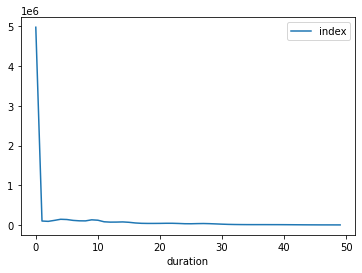

In [13]:
plot_duration_new_4.plot()


In [15]:
# Not Spam
plot_duration_0 = tk_list[tk_list['target'] == 0.].reset_index().groupby('duration')['index'].nunique()
plot_duration_new_0 = plot_duration_0.iloc[:100]
plot_duration_0

duration
0       90073
1        4215
2        6436
3        8783
4        9285
        ...  
7356        1
7365        1
7461        1
7526        1
8050        1
Name: index, Length: 2417, dtype: int64

<AxesSubplot:xlabel='duration'>

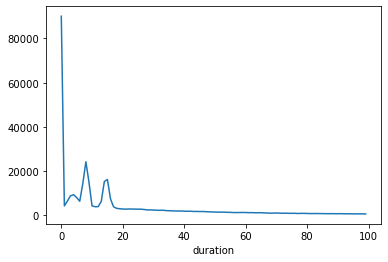

In [16]:
plot_duration_new_0.plot()

In [17]:
# Small business
plot_duration_1 = tk_list[tk_list['target'] == 1.].reset_index().groupby('duration')['index'].nunique()
plot_duration_new_1 = plot_duration_1.iloc[:200]
plot_duration_1

duration
0       8768
1        915
2       1435
3       1676
4       1262
        ... 
5089       1
5783       1
6316       1
6589       1
7247       1
Name: index, Length: 1239, dtype: int64

<AxesSubplot:xlabel='duration'>

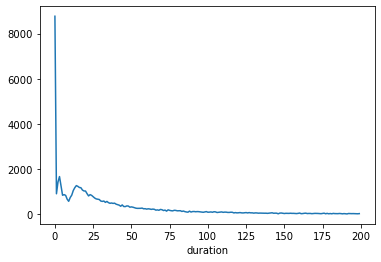

In [18]:
plot_duration_new_1.plot()

In [19]:
# Organisations
plot_duration_2 = tk_list[tk_list['target'] == 2.].reset_index().groupby('duration')['index'].nunique()
plot_duration_new_2 = plot_duration_2.iloc[:200]
plot_duration_2

duration
0        209315
1          4063
2          5198
3          8169
4         10465
          ...  
14640         1
15201         1
16957         1
18859         1
21821         1
Name: index, Length: 2313, dtype: int64

<AxesSubplot:xlabel='duration'>

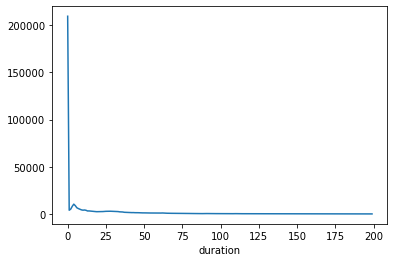

In [20]:
plot_duration_new_2.plot()

In [21]:
# Mobile carousel
plot_duration_3 = tk_list[tk_list['target'] == 3.].reset_index().groupby('duration')['index'].nunique()
plot_duration_new_3 = plot_duration_3.iloc[:200]
plot_duration_3

duration
0        117649
1          4168
2          5394
3          5440
4          4790
          ...  
24249         1
26716         1
27043         1
28974         1
29393         1
Name: index, Length: 2812, dtype: int64

<AxesSubplot:xlabel='duration'>

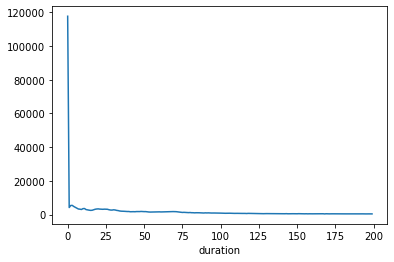

In [22]:
plot_duration_new_3.plot()

In [23]:
tk_list['source_b'].value_counts()

0    13191484
1     3337219
Name: source_b, dtype: int64

In [24]:
tk_list['source_f'].value_counts()

1    14150961
0     2377742
Name: source_f, dtype: int64

In [25]:
tk_list[(tk_list['source_b'] == 0) & (tk_list['source_f'] == 0)]

,id_a,id_b,start_time_local,time_zone,duration,forward,zero_call_flg,source_b,source_f,num_b_length,time_key,target


In [26]:
tk_list['num_b_length'].value_counts()

10    16522520
12        3719
11        1537
15         247
18         205
13         169
19         152
14         126
16          26
20           1
17           1
Name: num_b_length, dtype: int64

In [27]:
tk_list[(tk_list['num_b_length'] == 15) & (tk_list['duration'] != 0)]

,id_a,id_b,start_time_local,time_zone,duration,forward,zero_call_flg,source_b,source_f,num_b_length,time_key,target
15475383,28476392,84344320,09:54:24,0,40,0,0,0,1,15,2021-12-02,4.0
15566931,39666332,69544790,10:41:49,3,26,0,0,0,1,15,2021-12-02,3.0
16319979,41691880,21718966,11:15:21,0,83,0,0,1,0,15,2021-12-02,1.0
16319985,41691880,55221758,14:02:38,0,7,0,0,1,0,15,2021-12-02,1.0
16320003,41691880,10758821,10:39:54,0,162,0,5,1,0,15,2021-12-02,1.0
16320017,41691880,3935662,12:01:13,0,94,0,5,1,0,15,2021-12-03,1.0
16320025,41691880,3116683,19:10:10,0,255,0,0,1,0,15,2021-12-03,1.0
16320030,41691880,30312822,10:30:54,0,118,0,0,1,0,15,2021-12-03,1.0
16320048,41691880,23221123,10:37:05,0,184,0,0,1,0,15,2021-12-03,1.0


In [28]:
pl4 = tk_list[tk_list['target'] == 4.].reset_index().groupby('time_key')['index'].nunique()
pl4

time_key
2021-12-01    2280958
2021-12-02    2751461
2021-12-03    2631695
Name: index, dtype: int64

<AxesSubplot:xlabel='time_key'>

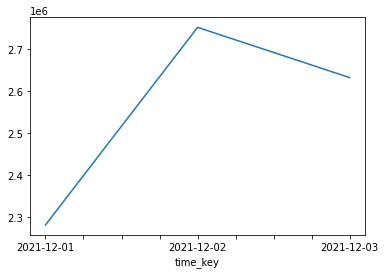

In [29]:
# Spam
pl4.plot()

In [30]:
pl0 = tk_list[tk_list['target'] == 0.].reset_index().groupby('time_key')['index'].nunique()
pl0

time_key
2021-12-01    132985
2021-12-02    148487
2021-12-03    148362
Name: index, dtype: int64

<AxesSubplot:xlabel='time_key'>

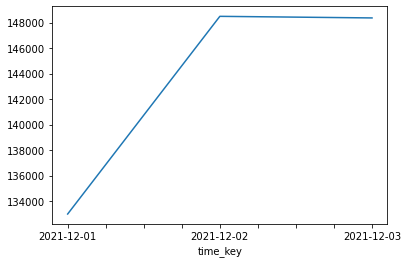

In [31]:
# Not spam
pl0.plot()

In [32]:
pl1 = tk_list[tk_list['target'] == 1.].reset_index().groupby('time_key')['index'].nunique()

<AxesSubplot:xlabel='time_key'>

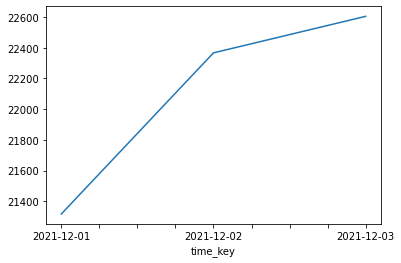

In [33]:
# Small business
pl1.plot()

In [34]:
pl2 = tk_list[tk_list['target'] == 2.].reset_index().groupby('time_key')['index'].nunique()

<AxesSubplot:xlabel='time_key'>

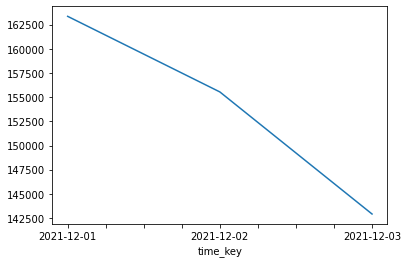

In [35]:
# Organisations
pl2.plot()

In [36]:
pl3 = tk_list[tk_list['target'] == 3.].reset_index().groupby('time_key')['index'].nunique()
pl3

time_key
2021-12-01    146108
2021-12-02    172684
2021-12-03    174231
Name: index, dtype: int64

<AxesSubplot:xlabel='time_key'>

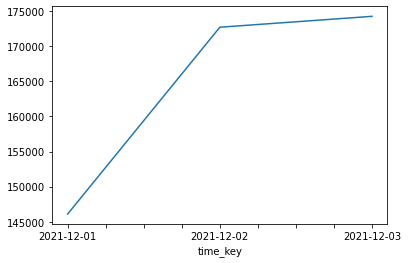

In [37]:
# Mobile carousel
pl3.plot()

In [38]:
tk_list[tk_list['target'] == 4.].reset_index()

,index,id_a,id_b,start_time_local,time_zone,duration,forward,zero_call_flg,source_b,source_f,num_b_length,time_key,target
0,186415,859841,70423563,02:16:16,7,0,1,5,1,0,10,2021-12-01,4.0
1,186416,859841,70423563,14:03:51,7,0,1,5,1,0,10,2021-12-01,4.0
2,186417,859841,36846993,05:37:56,0,0,1,5,1,0,10,2021-12-01,4.0
3,186418,859841,86828364,13:17:43,7,0,1,5,1,0,10,2021-12-01,4.0
4,186419,859841,86828364,22:19:28,7,0,1,5,1,0,10,2021-12-01,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7664109,16528661,16988388,67074238,11:58:52,0,0,0,5,0,1,10,2021-12-03,4.0
7664110,16528669,53315751,40643616,10:07:46,3,0,0,0,0,1,10,2021-12-03,4.0
7664111,16528671,37890347,68064871,17:13:03,3,8,0,0,0,1,10,2021-12-03,4.0
7664112,16528685,17129978,82636499,14:26:58,3,0,0,0,0,1,10,2021-12-03,4.0


In [39]:
tk_list[tk_list['target'] == 4.]

,id_a,id_b,start_time_local,time_zone,duration,forward,zero_call_flg,source_b,source_f,num_b_length,time_key,target
186415,859841,70423563,02:16:16,7,0,1,5,1,0,10,2021-12-01,4.0
186416,859841,70423563,14:03:51,7,0,1,5,1,0,10,2021-12-01,4.0
186417,859841,36846993,05:37:56,0,0,1,5,1,0,10,2021-12-01,4.0
186418,859841,86828364,13:17:43,7,0,1,5,1,0,10,2021-12-01,4.0
186419,859841,86828364,22:19:28,7,0,1,5,1,0,10,2021-12-01,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16528661,16988388,67074238,11:58:52,0,0,0,5,0,1,10,2021-12-03,4.0
16528669,53315751,40643616,10:07:46,3,0,0,0,0,1,10,2021-12-03,4.0
16528671,37890347,68064871,17:13:03,3,8,0,0,0,1,10,2021-12-03,4.0
16528685,17129978,82636499,14:26:58,3,0,0,0,0,1,10,2021-12-03,4.0
